# Forecasting with Facebook Prophet

Welcome to the world of advanced time series forecasting! In this guide, we'll delve into the powerful capabilities of [Facebook Prophet](https://facebook.github.io/prophet/), a robust open-source tool designed for accurate and efficient time series forecasting. Whether you're a data scientist, analyst, or just someone keen on predicting future trends, Prophet can be your go-to solution.

## What is Facebook Prophet?

**Facebook Prophet** is a forecasting tool developed by the data science team at Facebook. It's specifically crafted to handle time series data with daily observations that display patterns such as holidays and special events. Prophet is designed to be user-friendly, making it accessible to both beginners and experienced forecasters. With its automatic handling of seasonality, holidays, and outliers, Prophet simplifies the forecasting process while delivering accurate and interpretable results.

## What You'll Learn

In this guide, we'll walk you through the key features of Prophet, step-by-step implementation, and best practices for optimizing your forecasts. Whether you're forecasting stock prices, demand for a product, or any other time-dependent data, this guide aims to equip you with the knowledge and skills to harness the full potential of Facebook Prophet.

Let's embark on the journey of unlocking insights from your time series data and making informed decisions based on accurate forecasts. Happy forecasting! 🚀

## Loading the data

I made a dataset for this exercise, where we can see the development of visits to a web platform between 2016 and 2023

In [1]:
import pandas as pd
df = pd.read_csv('/Users/lucarugiu/Desktop/Git_portfolio/05_Forecasting_Prophet/prophet_input.csv')
df.head()

,MONTH_ID,VISITS
0,01/01/2016,17280159
1,01/02/2016,18732101
2,01/03/2016,19599117
3,01/04/2016,18833381
4,01/05/2016,20404516


In [2]:
KPI = 'VISITS'     

# Filter the DataFrame to select rows where KPI is not null
df = df.loc[df[KPI] > 0]

selected_columns = ['MONTH_ID', KPI]

# Create a copy of the selected data
data = df[selected_columns].copy()

In [3]:
# create monthly moving average to have a look at the trend
data['MA12'] = data[KPI].rolling(12).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(data, x="MONTH_ID", y=[KPI, "MA12"], template = 'plotly_dark')
fig.show()

In [5]:
#pip install prophet

In [4]:
df.head()

,MONTH_ID,VISITS
0,01/01/2016,17280159
1,01/02/2016,18732101
2,01/03/2016,19599117
3,01/04/2016,18833381
4,01/05/2016,20404516


In [10]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Assuming your dataframe is named 'df' with columns 'MONTH_ID' and 'VISITS'
# Rename the columns to match Prophet's required format
df = df.rename(columns={'MONTH_ID': 'ds', 'VISITS': 'y'})

# Convert the 'ds' column to datetime
df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')

# Initialize the Prophet model
model = Prophet(
    yearly_seasonality=False,  # No yearly seasonality for monthly data
    weekly_seasonality=False,  # No weekly seasonality for monthly data
    daily_seasonality=False,   # No daily seasonality for monthly data
    changepoint_prior_scale=0.9
)

# Add the monthly seasonality
model.add_seasonality(
    name='monthly',
    period=180.5,
    fourier_order=2
)

# Fit the model
model.fit(df)

# Create a future DataFrame for prediction (4 months into the future)
months_FC = 4  # You need to define this variable
future = model.make_future_dataframe(periods=months_FC, freq='M')

# Make predictions for the future
forecast = model.predict(future)

# Extract the predicted values for the next 4 months
predicted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(months_FC)

# Display the predicted values
print(predicted_values)

15:22:01 - cmdstanpy - INFO - Chain [1] start processing
15:22:02 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower    yhat_upper
96 2023-12-31  5.793851e+07  5.469913e+07  6.130065e+07
97 2024-01-31  5.927253e+07  5.614152e+07  6.247303e+07
98 2024-02-29  5.876779e+07  5.558301e+07  6.204791e+07
99 2024-03-31  5.862877e+07  5.531667e+07  6.187102e+07


In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
# Plot forecast and components
fig = plot_plotly(model, forecast)
fig.show()
fig = plot_components_plotly(model, forecast)
fig.show()

fc = forecast[['ds', 'yhat']]

In [15]:
predicted_values.tail(8)

,ds,yhat,yhat_lower,yhat_upper
96,2023-12-31,5.793851e+07,5.469913e+07,6.130065e+07
97,2024-01-31,5.927253e+07,5.614152e+07,6.247303e+07
98,2024-02-29,5.876779e+07,5.558301e+07,6.204791e+07
99,2024-03-31,5.862877e+07,5.531667e+07,6.187102e+07


### In the fc file we can see the results of the forecasting for 3 months in the future in the column 'yhat' and the upper/lower CI. 

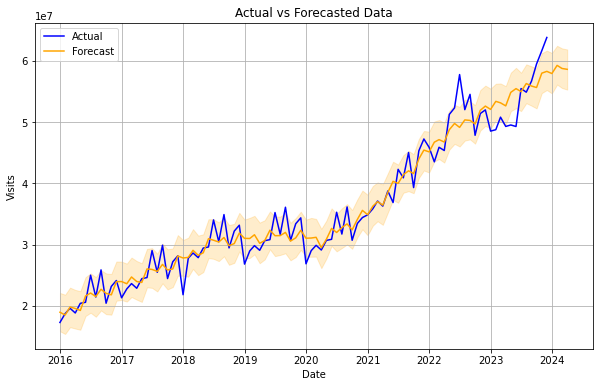

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(df['ds'], df['y'], label='Actual', color='blue')

# Plot forecasted data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')

# Fill confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

# Customize the plot
plt.title('Actual vs Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.legend()
plt.grid(True)
plt.show()
